<a href="https://colab.research.google.com/github/LeVuPhuoc/AI-Robotics/blob/main/Robot_2dof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import thư viện

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam

# 2.Hàm con vẽ đồ thị

In [ ]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

# 3. Tạo data

In [ ]:
from re import U
import matplotlib.pyplot as plt
import math
import csv
import numpy as np
u=[]
for i in range(0,181,2):
  z=[]
  for j in range(0,181,2):
    x=50*math.cos(math.radians(i))+40*math.cos(math.radians(i+j))
    y=50*math.sin(math.radians(i))+40*math.sin(math.radians(i+j))
    
    z.append(np.array((i,j,x,y)))
  u.extend(z)
#print(u)

In [ ]:
header = ['anpha', 'beta', 'x', 'y']
#header = [ 'x', 'y']
with open('robot_2dof.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(u)

# 4. Xử lý dữ liệu


In [ ]:
data = pd.read_csv('robot_2dof.csv')
data.shape
numpy_dataset = data.values
y=numpy_dataset[:,:2]
x=numpy_dataset[:,2:]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
print(x_train[0])
print(y_train[0])
print("Original data is:",x_train)
print("Shape of data is: ",x_train.shape)

[17.19807265 71.91875187]
[46. 70.]
Original data is: [[ 1.71980727e+01  7.19187519e+01]
 [ 1.44215866e+01  5.02388024e+01]
 [-7.88010754e+00  6.15661475e+00]
 ...
 [ 6.55967481e+00  3.71543839e+01]
 [-2.65106032e+01 -2.23506885e+00]
 [-1.01210933e+01  1.27279413e-02]]
Shape of data is:  (6624, 2)


# 5. Train model

In [ ]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))
model.summary()
model.compile(loss='mse', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 50, validation_split = 0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 10,786
Trainable params: 10,786
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
166/166 [==============================] - 1s 3ms/step - loss: 4560.4888 - acc: 0.6558 - val_loss: 3866.2163 - val_acc: 0.6838
Epoch 2/50
166/166 [========================

# 6. Kiểm tra kết quả

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('sai so kiem tra la',score[0])
print('do chinh xac kiem tra',score[1])

sai so kiem tra la 7.012068271636963
do chinh xac kiem tra 0.9837055206298828


[[149.26814  144.66324 ]
 [ 59.868366  34.74511 ]
 [ 33.749424  17.135454]
 ...
 [ 88.06964   76.503075]
 [121.76599  136.41373 ]
 [140.6805   177.27432 ]]


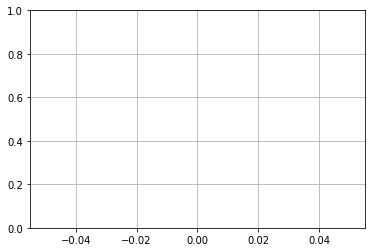

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


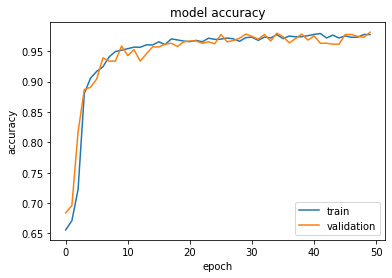

In [ ]:
score = model.evaluate(x_test,y_test,verbose = 0)
y_pred = model.predict(x_test)
print(y_pred)
pd.DataFrame(history.history)
plt.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper_left')
plt.show()

#7. Kiểm tra lại

In [ ]:
Px_test_train = 0
Py_test_train = 60
print(Px_test_train,Py_test_train)
test = model.predict([[Px_test_train,Py_test_train]])
t1 = test[0][0]
t2 = test[0][1]
x_1=50*math.cos(math.radians(t1))+40*math.cos(math.radians(t1+t2))
y_1=50*math.sin(math.radians(t1))+40*math.sin(math.radians(t1+t2))
print('x = ',x_1,'\ny = ',y_1)
print(t1,t2)

0 60
x =  -0.015227184230731439 
y =  60.538487399120385
48.956898 96.244576


In [ ]:
model.save('Robot_2dof.h5')